<a href="https://colab.research.google.com/github/inshra12/Protein-Sequence-Clustering/blob/main/Protein_Sequence_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import libraries

In [1]:
!pip install biopython #reading sequences

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.4 MB/s eta 0:00:00


In [10]:
from Bio import SeqIO
import pandas as pd

Step 2 Read Fasta File

In [5]:
records = list(SeqIO.parse("/content/proteinSequences.fasta" , "fasta"))

In [6]:
print(records)

[SeqRecord(seq=Seq('MGNIKFLLLVFFLIVVVVNGCWEEERNALLELQTNIMSSNGELLVDWAGYNAAH...NVG'), id='sp|A0A3Q7HJG4|CURE1_SOLLC', name='sp|A0A3Q7HJG4|CURE1_SOLLC', description='sp|A0A3Q7HJG4|CURE1_SOLLC Cuscuta receptor 1 OS=Solanum lycopersicum OX=4081 GN=Solyc08g016270 PE=1 SV=1', dbxrefs=[]), SeqRecord(seq=Seq('MNGLFLFCVATTAALAYGSDAPCTNSGGVCQDDHLACHNGHYQSGLCTGGAHRR...NSK'), id='sp|B3A003|LYS3_CRAVI', name='sp|B3A003|LYS3_CRAVI', description='sp|B3A003|LYS3_CRAVI Lysozyme 3 OS=Crassostrea virginica OX=6565 GN=lysoz3 PE=1 SV=1', dbxrefs=[]), SeqRecord(seq=Seq('SLSDKDKTFVKAFWGKLKGKADDVGAEALARMFGAFPATKSYFAHWPDLSAGSG...KYR'), id='sp|B3EWR7|HBAC_OPHSE', name='sp|B3EWR7|HBAC_OPHSE', description='sp|B3EWR7|HBAC_OPHSE Hemoglobin cathodic subunit alpha OS=Ophisurus serpens OX=1234705 PE=1 SV=1', dbxrefs=[]), SeqRecord(seq=Seq('MLKLTLTILAAVLLVTPAFGKVYTRCSLAREMHTLGVPKNQLARWTCIAEHESA...DCF'), id='sp|C0HLB7|LYS2_LUCSE', name='sp|C0HLB7|LYS2_LUCSE', description='sp|C0HLB7|LYS2_LUCSE Lysozyme 2 OS=Lucilia serica

# Step 3: Create a DataFrame to easily work with sequences

In [12]:
data = pd.DataFrame({
    "id" : [r.id for r in records],
    "sequence" : [str(r.seq) for r in records],
    "length" : [len(r.seq) for r in records]
})

In [14]:
data.head()

,id,sequence,length
0,sp|A0A3Q7HJG4|CURE1_SOLLC,MGNIKFLLLVFFLIVVVVNGCWEEERNALLELQTNIMSSNGELLVD...,1121
1,sp|B3A003|LYS3_CRAVI,MNGLFLFCVATTAALAYGSDAPCTNSGGVCQDDHLACHNGHYQSGL...,187
2,sp|B3EWR7|HBAC_OPHSE,SLSDKDKTFVKAFWGKLKGKADDVGAEALARMFGAFPATKSYFAHW...,142
3,sp|C0HLB7|LYS2_LUCSE,MLKLTLTILAAVLLVTPAFGKVYTRCSLAREMHTLGVPKNQLARWT...,142
4,sp|C1IIX1|LYSC_PENME,MRVLPLALLVGLLAVSDAKVLGKCEFARLLETRYNLSRNDIKNWVC...,158


In [20]:
print("Total Sequences :",len(data)) #total sequences
print("Average Length :",data['length'].mean()) #average length

Total Sequences : 305
Average Length : 289.7409836065574


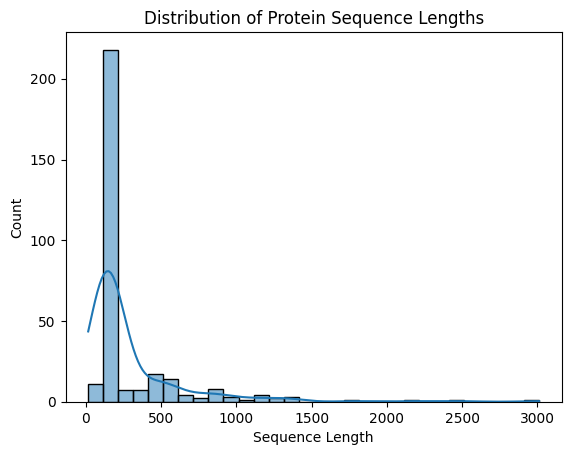

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['length'], bins=30, kde=True)
plt.title("Distribution of Protein Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.show()